In [198]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [199]:
#Lendo arquivo train.csv e atribuindo ao dataframe
df_train = pd.read_csv("train.csv")

In [200]:
#Printando 5 primeiuras linhas do DF_train
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
#n. de linhas e colunas
df_train.shape

(891, 12)

In [202]:
#Informações do DF_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
#Detalhamento do conjunto de treinamento
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
#Lendo arquivo test.csv e atribuindo ao dataframe
df_test = pd.read_csv("test.csv")

In [205]:
#Printando 5 primeiuras linhas do DF_test
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
#n. de linhas e colunas
df_test.shape

(418, 11)

In [207]:
#Detalhamento do conjunto de test
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


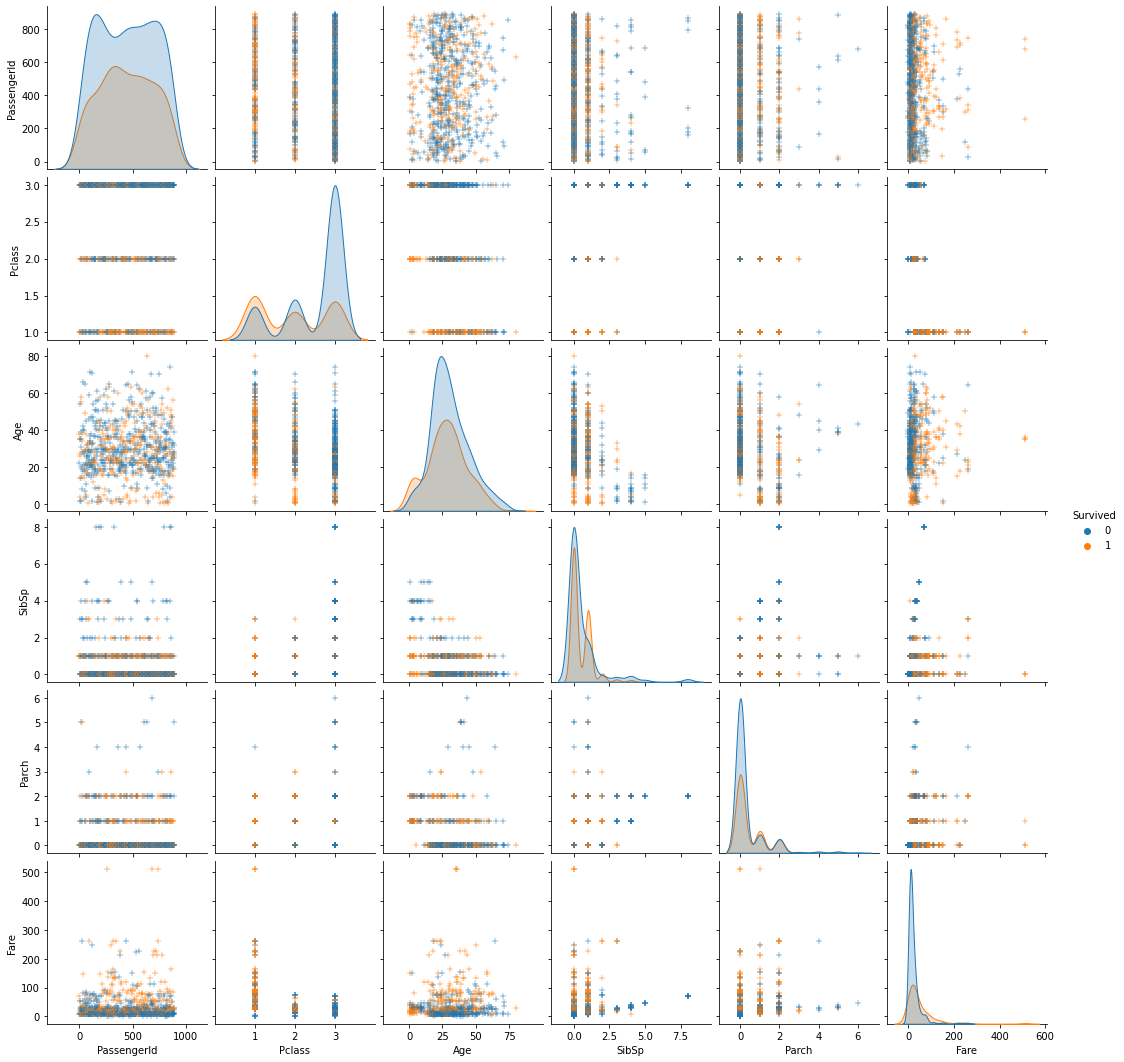

In [208]:
#Vizualizando graficamente o DF_train
a=sns.pairplot(df_train, hue='Survived', markers='+')
plt.show()

In [209]:
# Checando valores nulos no df_train
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [210]:
# Checando valores nulos no df_test
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [211]:
# Escolhendo as features que serão usadas
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',]
X = df_train.loc[: ,features]
y = df_train['Survived']

# Mapeando o Sexo para o tipo inteiro
X['Sex'] = X['Sex'].map( {'male':1, 'female':0} )

# Alterando as idades desconhecidas para a média das idades
X['Age'] = X['Age'].fillna(28.0)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [212]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**DecisionTreeClassifier with Default Parameters (max_depth=16, min_samples_split=2)**

In [213]:
#importando Classificador e treinando modelo
decisionTreeClf = DecisionTreeClassifier(random_state=0)
decisionTreeClf.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [214]:
#Tamanho da árvore
decisionTreeClf.get_depth()

18

[Text(110.1497895773639, 211.7178947368421, 'X[1] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(53.32177650429799, 200.2736842105263, 'X[0] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(25.58166189111748, 188.82947368421054, 'X[2] <= 2.5\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(23.023495702005732, 177.38526315789474, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(28.13982808022923, 177.38526315789474, 'X[5] <= 28.856\ngini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(23.023495702005732, 165.94105263157894, 'X[5] <= 28.231\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(20.465329512893984, 154.49684210526317, 'X[2] <= 56.0\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(15.348997134670487, 143.05263157894737, 'X[4] <= 0.5\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(12.79083094555874, 131.60842105263157, 'X[2] <= 37.0\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(7.6744985673352435, 120.164210526315

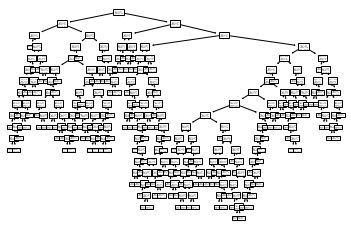

In [215]:
#Plotando a árvore de decisão
tree.plot_tree(decisionTreeClf)

In [216]:
#Predizendo valores e guadando em val_predictions
val_predictions = decisionTreeClf.predict(val_X)

In [217]:
#Printando algumas Métricas
print(classification_report(val_y,val_predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.71      0.71      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [218]:
print(confusion_matrix(val_y,val_predictions))

[[115  24]
 [ 24  60]]


In [219]:
accuracy = accuracy_score(val_y, val_predictions)
accuracy

0.7847533632286996

**DecisionTreeClassifier(max_depth=10, min_samples_split=2)**

In [220]:
#importando Classificador e treinando modelo
decisionTreeClf = DecisionTreeClassifier(random_state=0, max_depth=10)
decisionTreeClf.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [221]:
#Predizendo valores e guadando em val_predictions
val_predictions = decisionTreeClf.predict(val_X)

print(classification_report(val_y,val_predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       139
           1       0.84      0.68      0.75        84

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [222]:
print(confusion_matrix(val_y,val_predictions))

[[128  11]
 [ 27  57]]


In [223]:
accuracy = accuracy_score(val_y, val_predictions)
accuracy

0.8295964125560538

Como podemos observar, tivemos uma acurácia melhor se comparado ao experimento anterior apenas ao diminuir a profundidade da árvore. Embora o experimento anterior tivesse uma árvore maior e mais complexa, com um maior número de nós e splits, isso nem sempre leva a um melhor resultado, pois poderá estar levando o classificador a um overfitting.

[Text(132.31826675257733, 207.55636363636364, 'X[1] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(70.64884020618557, 187.7890909090909, 'X[0] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(34.51546391752578, 168.0218181818182, 'X[2] <= 2.5\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(31.0639175257732, 148.25454545454545, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(37.96701030927835, 148.25454545454545, 'X[5] <= 28.856\ngini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(31.0639175257732, 128.48727272727274, 'X[5] <= 28.231\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(27.61237113402062, 108.72, 'X[2] <= 56.0\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(20.709278350515465, 88.95272727272729, 'X[4] <= 0.5\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(17.25773195876289, 69.18545454545455, 'X[2] <= 37.0\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(10.354639175257732, 49.418181818181836, 'X[2] <= 27.5\

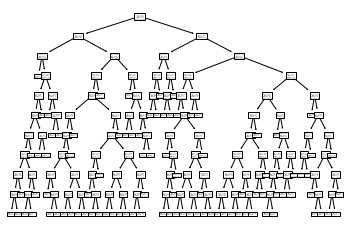

In [224]:
#Plotando a árvore de decisão
tree.plot_tree(decisionTreeClf)

**DecisionTreeClassifier(max_depth=10, min_samples_split=10)**

In [238]:
#importando Classificador e treinando modelo
decisionTreeClf = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=10)
decisionTreeClf.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [239]:
#Predizendo valores e guadando em val_predictions
val_predictions = decisionTreeClf.predict(val_X)

In [240]:
print(confusion_matrix(val_y,val_predictions))

[[120  19]
 [ 26  58]]


In [241]:
accuracy = accuracy_score(val_y, val_predictions)
accuracy

0.7982062780269058

[Text(141.51686746987951, 207.55636363636364, 'X[1] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(80.00240963855421, 187.7890909090909, 'X[0] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(43.026506024096385, 168.0218181818182, 'X[2] <= 2.5\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(37.64819277108434, 148.25454545454545, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(48.40481927710843, 148.25454545454545, 'X[5] <= 28.856\ngini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(37.64819277108434, 128.48727272727274, 'X[5] <= 28.231\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(32.26987951807229, 108.72, 'X[2] <= 56.0\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(26.89156626506024, 88.95272727272729, 'X[4] <= 0.5\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(21.513253012048192, 69.18545454545455, 'X[2] <= 37.0\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(16.134939759036143, 49.418181818181836, 'X[2] <= 27

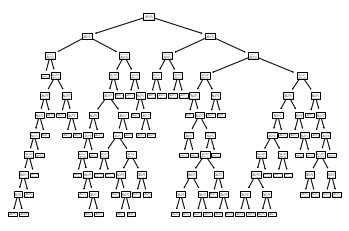

In [242]:
#Plotando a árvore de decisão
tree.plot_tree(decisionTreeClf)

**DecisionTreeClassifier(max_depth=2, min_samples_split=2)**

In [229]:
#importando Classificador e treinando modelo
decisionTreeClf = DecisionTreeClassifier(random_state=0, max_depth=2)
decisionTreeClf.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [230]:
#Predizendo valores e guadando em val_predictions
val_predictions = decisionTreeClf.predict(val_X)

In [231]:
print(confusion_matrix(val_y,val_predictions))

[[110  29]
 [ 21  63]]


In [232]:
accuracy = accuracy_score(val_y, val_predictions)
accuracy

0.7757847533632287

Diferentemente de alguns experimentos anteriores, onde foi possível observar o overfitting, nesse caso, por termos criado uma árvore de decisão com uma pequena profundidade igual a 2, temos que o classificador sofreu underfitting e não conseguiu relacionar bem a entrada com a saída, tendo uma pior acurácia se comparado aos anteriores. 

[Text(167.4, 181.2, 'X[1] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(41.85, 36.23999999999998, 'gini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.499\nsamples = 102\nvalue = [49, 53]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 14.0\ngini = 0.311\nsamples = 437\nvalue = [353, 84]'),
 Text(209.25, 36.23999999999998, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(292.95, 36.23999999999998, 'gini = 0.275\nsamples = 407\nvalue = [340, 67]')]

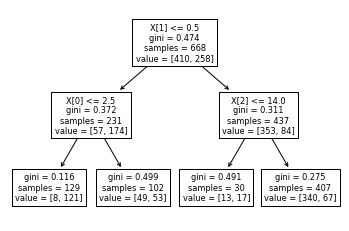

In [233]:
#Plotando a árvore de decisão
tree.plot_tree(decisionTreeClf)

**Usando GridSearch em busca de melhores parâmetros**

In [234]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,30,None],
    "min_samples_split": [2,5,7,10,15,20],
    "min_samples_leaf": [1,2,5,7,10,15,20]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(train_X, train_y)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.8432611352977789


In [235]:
#importando Classificador e treinando modelo
decisionTreeClf = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_split=2, min_samples_leaf=15)
decisionTreeClf.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(167.4, 190.26, 'X[1] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(83.7, 135.9, 'X[0] <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 28.856\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(20.925, 27.180000000000007, 'gini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.051\nsamples = 76\nvalue = [2, 74]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 23.35\ngini = 0.499\nsamples = 102\nvalue = [49, 53]'),
 Text(104.625, 27.180000000000007, 'gini = 0.469\nsamples = 80\nvalue = [30, 50]'),
 Text(146.475, 27.180000000000007, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 14.0\ngini = 0.311\nsamples = 437\nvalue = [353, 84]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 3.5\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.444\nsamples = 15\nvalue = [5, 

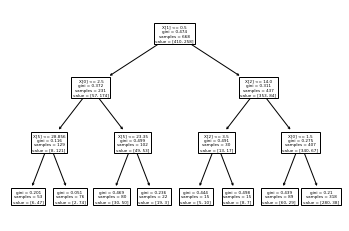

In [236]:
#Plotando a árvore de decisão
tree.plot_tree(decisionTreeClf)